[Home](home.ipynb) > Generating networks with Homophily and Preferential Attachment

<img style='float: left;' src='https://www.gesis.org/fileadmin/styles/img/gs_home_logo_en.svg'>

### *Notebooks for Social Network Analysis*

# Generating Networks with Homophily and Preferential Attachment
Author: [Fariba Karimi](https://www.gesis.org/person/fariba.karimi)

Version: 0.9 (17.07.2019)

Please cite as: Karimi, Fariba (2019). Generating Networks with Homophily and Preferential Attachment. *Notebooks for Social Network Analysis*. GESIS. url:xxx

<div class="alert alert-info">
<big><b>Significance</b></big>

The homophilic networks with preferential attachment algorithm generates networks with tunable homophily, group sizes, and preferential attachment. This network model is from a family of growing network models where in each time step one node arrives and attaches to the existing nodes based on the homphily and preferential attachment. The preferential attachment, rich-get-richer mechanism, resembles the Matthew Effect. The homophily resembles nodes' tendency to attract others with specific intrinsic attributes. For example, in the context of sexual relationship, homophily among people of the same gender is low and in the context of the friendship the homophily among people of the same gender is high. The generative model is minimal and can be applied to explain inequalities that are observed in complex systems.
</div>

### For more information, please visit the following paper

<img style='float: left;'
src='images/SciRepKarimi.png' width='500' height='500' >





## Introduction

Homophily can put minority groups at a disadvantage by restricting their ability to establish links with a majority group or to access novel information. Here, we show how this phenomenon can influence the ranking of minorities in examples of real-world networks with various levels of heterophily and homophily ranging from sexual contacts, dating contacts, scientific collaborations, and scientific citations. We devise a social network model with tunable homophily and group sizes, and demonstrate how the degree ranking of nodes from the minority group in a network is a function of (i) relative group sizes and (ii) the presence or absence of homophilic behaviour. We provide analytical insights on how the ranking of the minority can be improved to ensure the representativeness of the group and correct for potential biases. Our work presents a foundation for assessing the impact of homophilic and
heterophilic behaviour on minorities in social networks.

In this study, we focus on two main mechanisms for the formation of ties: homophily [McPherson et al. (2001)](https://www.annualreviews.org/doi/abs/10.1146/annurev.soc.27.1.415) and preferential attachment [Barabási & Albert (1999)](https://doi.org/10.1126/science.286.5439.509),
and systematically study how relative size differences between groups in social networks, with various levels
of homophily, impact the ranking of nodes in synthetic and real-world networks. We build on previous models by systematically exploring the parameter range for homophily
and group size differences and offer analytical and empirical evidence on the emergent properties of networks
and the ranking of groups.


Network generators consist of simple mechanisms or rules on how nodes or links are to be attached to an initial network. One of the most basic mechanisms involves the *rich-get-richer effect* according to which a node's chance to acquire a new link is proportional to the number of links that node already has. Such an effect was described by [Merton (1968)](https://doi.org/10.1126/science.159.3810.56) for the accumulation of reward in the science system and termed the *Matthew Effect*.


[Barabási & Albert (1999)](https://doi.org/10.1126/science.286.5439.509) discovered power-law effects in complex social and technological networks. They introduced a model that formally combines network *growth* and *preferential attachment*, the latter being their term for the rich-get-richer mechanism, to generate undirected random networks with a power-law degree distribution. [Bollobás et al. (2001)](https://doi.org/10.1002/rsa.1009) proved that this mechanism generates scale-free networks with $p(k)\propto k^{-3}$, where $k$ is a node's degree (number of neighbors). The so-called BA Model remains one of the most fundamental network generators to date.

One fundamental aspect of many social networks is that they are comprised of individuals with a variety of attributes, such as race, age, educational background, or gender. Commonly, these attributes are distributed unequally in the population. For example, in many schools across the United States and Europe, Asian or Black students form a minority [Moody (2001)](https://www.journals.uchicago.edu/doi/abs/10.1086/338954); similarly, women are usually a minority in science and engineering [Jadidi et al.](https://www.worldscientific.com/doi/abs/10.1142/S0219525917500114). Additionally, homophily, the tendency to associate with similar others, is observed in many social networks, ranging from friendship to marriage to business partnerships. One study has shown that in school friendships, Asians and Blacks are biased towards interacting with their own race at a rate $>7$ times higher than Whites and that homophily has a nonlinear relationship with respect to relative group sizes [currarini et al. (2010)](https://www.pnas.org/content/107/11/4857.short). 

**In this notebook**, I provide an intuitive walk through the construction of the homophilic-preferential attachment network Model. In this model, nodes are assigned a binary attribute that resembles  their group membership. These attributes can be distributed equally or unequally in the network.  The probability of a new arrival node $j$ to attach to an existing node $i$ is based on the degree of the existing node $k_i$ (preferential attachment) and the homophily between $i$ and $j$, $h_{ij}$:

\begin{equation}
    p_{ij}=\frac{h_{ij} k_i}{\sum_i{h_{ij} k_i}},
\end{equation}



## Dependencies and Settings

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [3]:
warnings.filterwarnings('ignore')

## Model

``homophilic_ba_graph(N,m,min_fraction,homophily)`` is the main function to generate the network. This function can be called from ``generate_homophilic_graph_symmetric.py``. 


``N`` sets the size of the desired network (number of nodes). ``m`` is the minimum stubs required for each arrival node to attache to existing nodes. For example, when $m=2$, each arrival node connects to 2 existing nodes. It has been proved mathamatically that $m$ does not affect the structural properties of the network. ``min_fraction`` is the minortiy fraction that can ranges from 0 to 0.5. ``homophily`` is the parameter that determines the tendency between two nodes to be connected. Homophily parameter ranges from 0 to 1. 



In [4]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph

### Draw the network

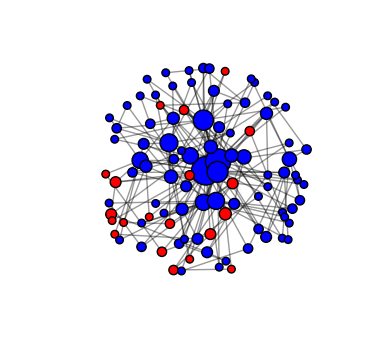

In [5]:
G = homophilic_ba_graph(N = 100, m = 2 , minority_fraction = 0.2, homophily= 0.8)

color = nx.get_node_attributes(G,'color')
d = dict(G.degree)

pos = nx.spring_layout(G, k = 8/10) #k:distance between the nodes


plt.figure(figsize=(4,4))
nx.draw_networkx_edges(G, pos = pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos = pos, nodelist=color.keys(),
                       node_size=[v * 15 for v in d.values()],
                       node_color=list(color.values()),
                      cmap=plt.cm.Reds_r)


plt.axis('off')
plt.show()

### Degree Dynamic

Degree growth for each group of minority and majority changes over time as follows:
$$ k_a(t) \propto t^{\beta_a} $$

where $\beta$ is the exponent of the degree growth and has a following relation with homophily and group size:

$$ \frac{f_ah}{hC + (1-h)(2-C)} + \frac{f_b(1-h)}{(1-h)C + h(2-C)} $$

$C$ is a multinomial function with 3 roots that 1 root is only accepted. ``analytical_prediction`` function below, calculate $\beta$ values analytically. 


In [6]:
def analytical_prediction(homophily,min_fraction):
    # group a is the minority
    pa = min_fraction #equal to min fraction
    pb = 1-pa

    daa = homophily
    dab = 1- daa

    A = -1
    B = 2 + 2*pa*daa - pa*dab - dab*pb + 2*dab 
    C = -4*pa*daa + 2*pa*dab -4*dab - 2*daa*dab*pa + 2 * (dab**2)*pb
    D = +4*daa*dab*pa

    p = [A,B,C,D]

    ca = np.roots(p)[1] #only one root is acceptable

    beta_a = (daa*pa*(2-ca) + ca *dab*pb) / (ca*(2-ca))
    beta_b = 1 - (pb*(1-beta_a))/(2-2*beta_a-pa)

    return beta_a,beta_b

#### Degree growth of the minority and the majority (comparing analytical and numerical analysis)

In the following code, we compare the degree growth of the minority and majority given the homophily and the minority size. We also compare the results from the numerical simulation (dots) with results from analytical predictions (dashed lines).

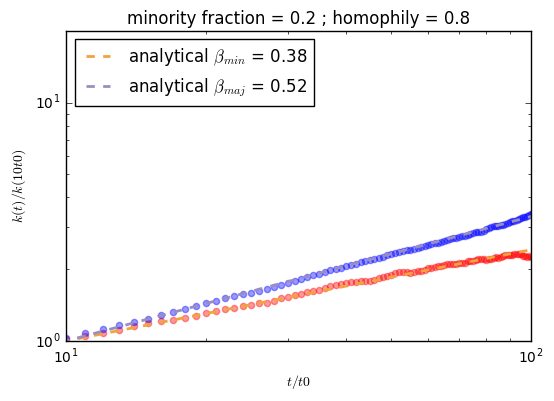

In [7]:

minority_file = open('degree_growth/minority_deg_f_0.2_sim_0.8.txt','r')
majority_file = open('degree_growth/majority_deg_f_0.2_sim_0.8.txt','r')

homophily = 0.8
N = 5000
min_fraction = 0.2

x = []
y_min = []
for line in minority_file:
    t,avg_deg = line.split(',')
    y_min.append(float(avg_deg))
    x.append(int(t))

plt.scatter(x,y_min ,color = 'r', alpha = 0.4  )

y_maj = []
for line in majority_file:
    t,avg_deg = line.split(',')
    y_maj.append(float(avg_deg))

plt.scatter(x,y_maj ,color = 'b', alpha = 0.4  )

##### prediction####            
beta_min , beta_maj = analytical_prediction(homophily,min_fraction)


x = np.arange(1,N)
#offset_min = np.mean(time_dict_minority[10.0]) - (10**beta_min)
offset_min = 10**(-beta_min)

predicted_value = (x**beta_min) * offset_min

plt.plot(x, predicted_value , label=r'analytical $\beta_{min}$ = %.2f'%beta_min , linestyle ='--' , color = '#f1a340' , linewidth=2)



offset_maj = 10**(-beta_maj)

predicted_value = (x**beta_maj) * offset_maj

plt.plot(x, predicted_value , label=r'analytical $\beta_{maj}$ = %.2f'%beta_maj , linestyle ='--' , color = '#998ec3' , linewidth=2)

plt.xlim(10,100)
plt.ylim(1,20)

plt.title("minority fraction = %s ; homophily = %s"%(min_fraction , homophily))
plt.ylabel(r"$k(t)/k(10 t0)$")
plt.xlabel(r"$t/t0$")
plt.legend(loc='upper left')

plt.yscale('log')
plt.xscale('log')
#plt.savefig('degree_dynamic_f_%s_sim_%s.pdf'%(min_fraction , homophily))
plt.show()



## Literature
Karimi, F., Génois, M., Wagner, C., Singer, P., & Strohmaier, M. (2018). Homophily influences ranking of minorities in social networks. Scientific reports, 8(1), 1-12.(https://www.nature.com/articles/s41598-018-29405-7)

Barabási, A.-L. & Albert, R. (1999). Emergence of scaling in random networks. *Science*, *286*(5439), 509–512. doi:[10.1126/science.286.5439.509](https://doi.org/10.1126/science.286.5439.509)

McPherson, M., Smith-Lovin, L. & Cook, J. M. Birds of a feather: Homophily in social networks. Annual review of sociology 415–444(2001).

Bianconi, G. & Barabási, A.-L. (2001). Competition and multiscaling in evolving networks. *EPL (Europhysics Letters)*, *54*(4), 436–442. doi:[10.1209/epl/i2001-00260-6](https://doi.org/10.1209/epl/i2001-00260-6)

Bollobás, B., Riordan, O., Spencer, J., & Tusnády, G. (2001). The degree sequence of a scale‐free random graph process. *Random Structures & Algorithms*, *18*(3), 279–290. doi:[10.1002/rsa.1009](https://doi.org/10.1002/rsa.1009)


Merton, R. K. (1968). The Matthew Effect in science. *Science*, *159*(3810), 56–63. doi:[10.1126/science.159.3810.56](https://doi.org/10.1126/science.159.3810.56)


Simon, H. A. (1955). On a class of skew distribution functions. *Biometrika*, *42*(3/4), 425–440. doi:[10.2307/2333389](https://doi.org/10.2307/2333389)


Jadidi, M., Karimi, F., Lietz, H., & Wagner, C. (2018). Gender disparities in science? Dropout, productivity, collaborations and success of male and female computer scientists. Advances in Complex Systems, 21(03n04), 1750011.

Currarini, S., Jackson, M. O., & Pin, P. (2010). Identifying the roles of race-based choice and chance in high school friendship network formation. Proceedings of the National Academy of Sciences, 107(11), 4857-4861.